In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import cna
import multianndata as mad
import scipy.io

# For reproducibility
np.random.seed(0)

In [3]:
import rpy2
from rpy2 import robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()

### Load data

We recommend that you embed in a lower dimensionality and pre-process with batch correction of your choice (assuming this is probably Harmony). The method still produces legit p-values if you don't, but it might be less well-powered if there are huge batch effects that it can't correct away.

In [13]:
myePCs = pd.read_csv("/data/srlab2/fzhang/results/2021-07-26_CNA_amp_phase2_each_celltype/fibro_hpc_input.csv")
del myePCs["Unnamed: 0"]
myePCs.head(2)
myePCs.shape

(61358, 20)

In [29]:
# myeMeta = pd.read_csv("/data/srlab2/fzhang/results/2021-07-26_CNA_amp_phase2_each_celltype/fibro_all_input.csv")
myeMeta = pd.read_csv("/data/srlab2/fzhang/results/2021-07-26_CNA_amp_phase2_each_celltype/fibro_all_input_US.csv")
del myeMeta["Unnamed: 0"]
myeMeta.head(2)
myeMeta.shape

/PHShome/fz049/miniconda3/envs/python39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(61358, 42)

In [30]:
myeMeta.columns

Index(['subject_id_primary', 'sample', 'V1', '...1', 'UMAP1', 'UMAP2',
       'old_UMAP1', 'old_UMAP2', 'CellID', 'nUMI', 'nGene', 'pct_mito',
       'pct_ribo', 'doublet_score', 'thresh_doublet', 'cell_type', 'SubjectID',
       'krenn_grade', 'sex', 'pathotype', 'density', 'aggr', 'krenn_lining',
       'krenn_inflam', 'RA_status', 'grey_scale', 'power_doppler',
       'old_clus0.6', 'res0.6', 'names_res0.6', 'id', 'donor', 'age',
       'new_class', 'E_F_M', 'F', 'M', 'T_B', 'T_F', 'T_M', 'US_greyscale',
       'US_PD'],
      dtype='object')

In [31]:
d = mad.MultiAnnData(X = myePCs, obs = myeMeta)
d.obs_to_sample(['donor', 'age', 'sex',  'US_greyscale', 'US_PD', 
                 'M', 'E_F_M', 'F', 'T_B', 'T_F', 'T_M'])
d.samplem.head()

['subject_id_primary' 'sample' 'CellID' 'cell_type' 'SubjectID'
 'pathotype' 'density' 'aggr' 'krenn_lining' 'krenn_inflam' 'grey_scale'
 'power_doppler' 'old_clus0.6' 'names_res0.6' 'id' 'new_class']
consider casting to numeric types where appropriate, and
consider re-coding text-valued columns with pandas.get_dummies


/PHShome/fz049/miniconda3/envs/python39/lib/python3.9/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


,donor,age,sex,US_greyscale,US_PD,M,E_F_M,F,T_B,T_F,T_M
id,,,,,,,,,,,
BRI-401,2,77.0,1.0,3.0,3.0,1,0,0,0,0,0
BRI-403,3,28.0,1.0,NaN,NaN,1,0,0,0,0,0
BRI-405,4,62.0,1.0,3.0,2.0,0,1,0,0,0,0
BRI-407,5,44.0,1.0,2.0,1.0,0,0,0,0,0,1
BRI-409,6,68.0,1.0,2.0,1.0,0,0,0,1,0,0


In [32]:
cna.pp.knn(d)

computing default knn graph


In [33]:
d.obsm['X_umap'] = myeMeta[['UMAP1', 'UMAP2']].to_numpy()

In [34]:
d.shape

(61358, 20)

In [35]:
cna.tl.nam(d)

qcd NAM not found; computing and saving
	taking step 1
	median kurtosis: 30.98411644662651
	taking step 2
	median kurtosis: 19.965273140439216
	taking step 3
	median kurtosis: 14.99738671618093
	taking step 4
	median kurtosis: 12.432975690150016
stopping after 4 steps
Pseudocount epsilon average: 0.0019007069028404873
covariate-adjusted NAM not found; computing and saving
Scaling nbhd variances


/PHShome/fz049/miniconda3/envs/python39/lib/python3.9/site-packages/cna/tools/_nam.py:77: UserWarning: only one unique batch supplied to qc
  warnings.warn('only one unique batch supplied to qc')
/PHShome/fz049/miniconda3/envs/python39/lib/python3.9/site-packages/cna/tools/_nam.py:99: UserWarning: only one unique batch supplied to prep
  warnings.warn('only one unique batch supplied to prep')


computing SVD


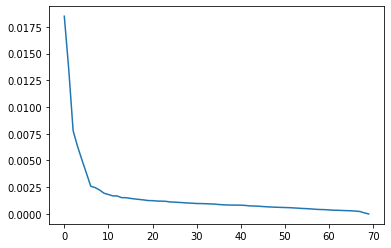

In [14]:
# type(d.uns['NAM_varexp'])
plt.plot(100 * d.uns['NAM_varexp'])

In [16]:
# Save NAM PCs
d.uns['NAM_nbhdXpc'] # neighborhood loadings
d.uns['NAM_nbhdXpc'].to_excel("/data/srlab2/fzhang/results/2021-07-26_CNA_amp_phase2_each_celltype/fibro_NAM_neighborhood_PCs.xlsx") 

In [17]:
# Save NAM PCs
d.uns['NAM_sampleXpc'] # sample loadings
d.uns['NAM_sampleXpc'].to_excel("/data/srlab2/fzhang/results/2021-07-26_CNA_amp_phase2_each_celltype/fibro_NAM_sample_PCs.xlsx") 

In [18]:
# save for future use
d.write("/data/srlab2/fzhang/results/2021-07-26_CNA_amp_phase2_each_celltype/fibro_cna.h5ad")

... storing 'sample' as categorical
... storing 'cell_type' as categorical
... storing 'SubjectID' as categorical
... storing 'pathotype' as categorical
... storing 'density' as categorical
... storing 'aggr' as categorical
... storing 'krenn_lining' as categorical
... storing 'krenn_inflam' as categorical
... storing 'grey_scale' as categorical
... storing 'power_doppler' as categorical
... storing 'old_clus0.6' as categorical
... storing 'names_res0.6' as categorical
... storing 'id' as categorical
... storing 'new_class' as categorical


## perform analysis

In [3]:
# Run association test.
res = cna.tl._association.association(d, #dataset 
                                      d.samplem.E_F_M, #phenotype: M, E_F_M, F, T_B, T_F, T_M, US_PD, US_greyscale
                                      batches=None, #batches
                                      covs=d.samplem[['age', 'sex']], #covariates
                                      Nnull=10000, # number of null permutations to do (defaults to only 1e3)
                                      ks=[1,2,3,4] # I asked the method to consider up to 10 PCs because
                                     #                           #it chose the max number of PCs it considered the default set of [1,2,3,4]
                                     )
print()
print('p =', res.p, ',', res.k, 'PCs used')
print('total r^2 between top {} NAM PCs and outcome is {:.2f}'.format(res.k, res.r2))

In [41]:
res.fdr_5p_t

In [42]:
myeMeta['res_ncorrs'] = res.ncorrs
myeMeta['res_kept'] = res.kept
myeMeta.shape

(61358, 44)

In [43]:
myeMeta.to_excel("/data/srlab2/fzhang/results/2021-07-26_CNA_amp_phase2_each_celltype/fibro_EFM_res_varscaRescale_pseudoc_cellnum_2021-10-20.xlsx") # p = 0.001; res.fdr_5p_t = 
# myeMeta.to_excel("/data/srlab2/fzhang/results/2021-07-26_CNA_amp_phase2_each_celltype/fibro_TF_res_varscaRescale_pseudoc_cellnum_2021-10-20.xlsx") # p = 0.048; res.fdr_5p_t = 
# myeMeta.to_excel("/data/srlab2/fzhang/results/2021-07-26_CNA_amp_phase2_each_celltype/fibro_F_res_varscaRescale_pseudoc_cellnum_2021-10-20.xlsx") # p = 0.0027; res.fdr_5p_t = 
# myeMeta.to_excel("/data/srlab2/fzhang/results/2021-07-26_CNA_amp_phase2_each_celltype/fibro_M_res_varscaRescale_pseudoc_cellnum_2021-10-20.xlsx") # p = 0.001; res.fdr_5p_t = 


# Visualize

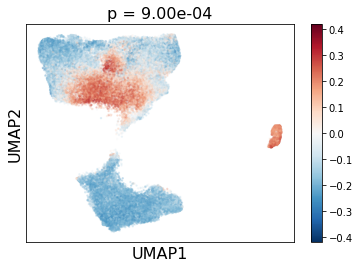

14364 neighborhoods passed FDR 10%


In [47]:
# M
f = plt.figure()
plot_order = np.random.choice(d.uns['keptcells'].sum(),d.uns['keptcells'].sum(),replace=False)
umap = d.obsm['X_umap'][d.uns['keptcells']][plot_order,:]
ix = np.repeat([True], d.uns['keptcells'].sum())
c = res.ncorrs[ix][plot_order]
# c = c-np.mean(c)
# c = c/np.std(c)
ax = plt.gca()
tmp = ax.scatter(*umap[ix].T, c=c[ix], 
           alpha=0.2,s=2, cmap='RdBu_r', 
           vmin=-max(np.abs(c)), vmax=max(np.abs(c)))
ax.set_xticks([]); ax.set_yticks([])
fig = plt.gcf()
cbar = fig.colorbar(tmp, ax=ax)
cbar.set_alpha(1)
cbar.draw_all()
plt.title('p = {:.2e}'.format(res.p), fontsize = 16)
plt.xlabel("UMAP1", fontsize = 16)
plt.ylabel("UMAP2", fontsize = 16)
plt.show()
print(sum(np.abs(res.ncorrs) >= res.fdr_10p_t), 'neighborhoods passed FDR 10%')
# f.savefig('.png', dpi = 300)  

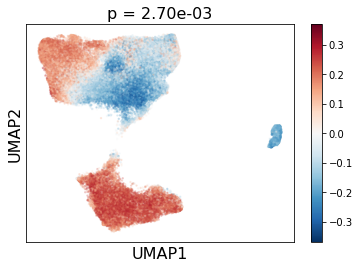

23033 neighborhoods passed FDR 10%


In [30]:
# F
f = plt.figure()
plot_order = np.random.choice(d.uns['keptcells'].sum(),d.uns['keptcells'].sum(),replace=False)
umap = d.obsm['X_umap'][d.uns['keptcells']][plot_order,:]
ix = np.repeat([True], d.uns['keptcells'].sum())
c = res.ncorrs[ix][plot_order]
# c = c-np.mean(c)
# c = c/np.std(c)
ax = plt.gca()
tmp = ax.scatter(*umap[ix].T, c=c[ix], 
           alpha=0.2,s=2, cmap='RdBu_r', 
           vmin=-max(np.abs(c)), vmax=max(np.abs(c)))
ax.set_xticks([]); ax.set_yticks([])
fig = plt.gcf()
cbar = fig.colorbar(tmp, ax=ax)
cbar.set_alpha(1)
cbar.draw_all()
plt.title('p = {:.2e}'.format(res.p), fontsize = 16)
plt.xlabel("UMAP1", fontsize = 16)
plt.ylabel("UMAP2", fontsize = 16)
plt.show()
print(sum(np.abs(res.ncorrs) >= res.fdr_10p_t), 'neighborhoods passed FDR 10%')
# f.savefig('.png', dpi = 300)  

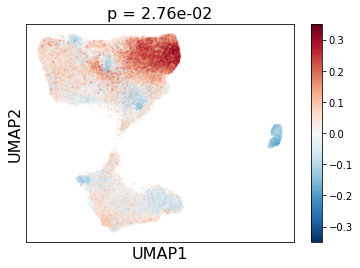

6402 neighborhoods passed FDR 10%


In [30]:
# T_F
f = plt.figure()
plot_order = np.random.choice(d.uns['keptcells'].sum(),d.uns['keptcells'].sum(),replace=False)
umap = d.obsm['X_umap'][d.uns['keptcells']][plot_order,:]
ix = np.repeat([True], d.uns['keptcells'].sum())
c = res.ncorrs[ix][plot_order]
# c = c-np.mean(c)
# c = c/np.std(c)
ax = plt.gca()
tmp = ax.scatter(*umap[ix].T, c=c[ix], 
           alpha=0.2,s=2, cmap='RdBu_r', 
           vmin=-max(np.abs(c)), vmax=max(np.abs(c)))
ax.set_xticks([]); ax.set_yticks([])
fig = plt.gcf()
cbar = fig.colorbar(tmp, ax=ax)
cbar.set_alpha(1)
cbar.draw_all()
plt.title('p = {:.2e}'.format(res.p), fontsize = 16)
plt.xlabel("UMAP1", fontsize = 16)
plt.ylabel("UMAP2", fontsize = 16)
plt.show()
print(sum(np.abs(res.ncorrs) >= res.fdr_10p_t), 'neighborhoods passed FDR 10%')
# f.savefig('.png', dpi = 300)  

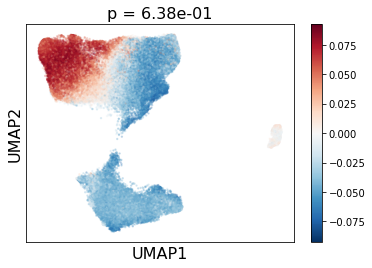

TypeError: '>=' not supported between instances of 'float' and 'NoneType'

In [44]:
# E_F_M: not significant
f = plt.figure()
plot_order = np.random.choice(d.uns['keptcells'].sum(),d.uns['keptcells'].sum(),replace=False)
umap = d.obsm['X_umap'][d.uns['keptcells']][plot_order,:]
ix = np.repeat([True], d.uns['keptcells'].sum())
c = res.ncorrs[ix][plot_order]
# c = c-np.mean(c)
# c = c/np.std(c)
ax = plt.gca()
tmp = ax.scatter(*umap[ix].T, c=c[ix], 
           alpha=0.2,s=2, cmap='RdBu_r', 
           vmin=-max(np.abs(c)), vmax=max(np.abs(c)))
ax.set_xticks([]); ax.set_yticks([])
fig = plt.gcf()
cbar = fig.colorbar(tmp, ax=ax)
cbar.set_alpha(1)
cbar.draw_all()
plt.title('p = {:.2e}'.format(res.p), fontsize = 16)
plt.xlabel("UMAP1", fontsize = 16)
plt.ylabel("UMAP2", fontsize = 16)
plt.show()
print(sum(np.abs(res.ncorrs) >= res.fdr_10p_t), 'neighborhoods passed FDR 10%')
# f.savefig('.png', dpi = 300)  